In [1]:
## Import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import fastf1 as f1
import requests
import json

In [2]:
## Define function ergast_get to query data from ergast

def ergast_get(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [3]:
# Assign no.of rounds for the 2022 season
rounds = 13

# Create empty dataframe to store race results
all_race_results = pd.DataFrame()

# Loop through all rounds
for i in range(1, rounds + 1):
    
    # Request race results endpoint for current round data
    race_result = ergast_get(f'2022/{i}/results')
    
    # Get race results from current round
    race_results = race_result['RaceTable']['Races'][0]['Results']
    
    # Create dictionary to store race results of current round
    race_current_round = {'round': i}
    
    # Loop through the race results
    for i in range(len(race_results)):
        driver = race_results[i]['Driver']['code']
        position = race_results[i]['position']
        
        # Store positions of the drivers
        race_current_round[driver] = int(position)
        
        # Append current round to empty dataframe
        all_race_results = all_race_results.append(race_current_round, ignore_index=True)
    
# Set round as index of final dataframe
all_race_results = all_race_results.set_index('round')

# Melt final dataframe so that data can be used to generate plot
all_race_results_melted = pd.melt(all_race_results.reset_index(), ['round'])

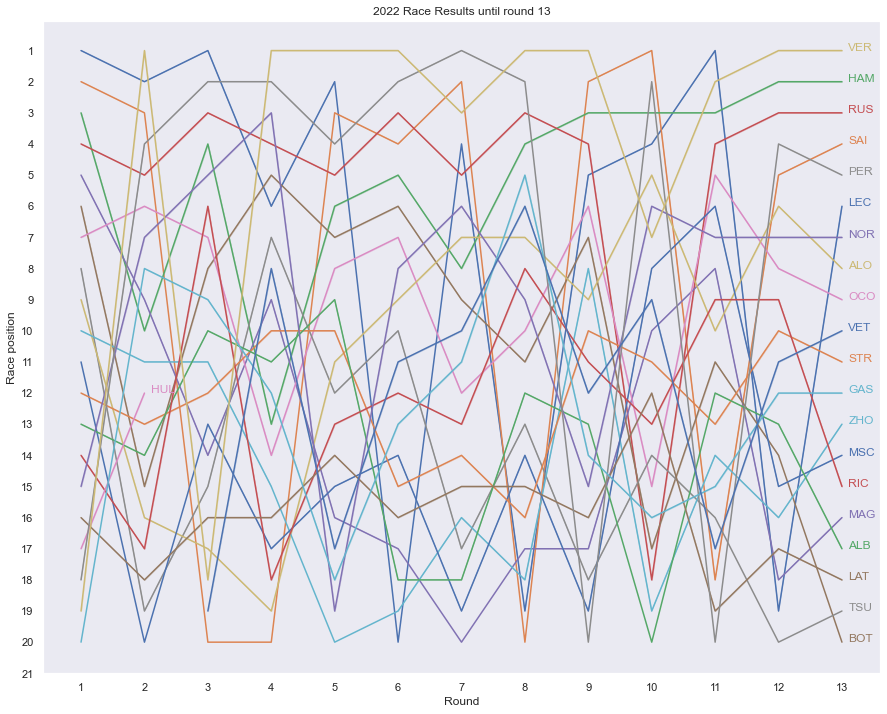

In [4]:
# Set size of the plot 
sns.set(rc={'figure.figsize':(15, 12)})

# Generate the plot
fig, ax_race = plt.subplots()

# Set title of the plot
ax_race.set_title("2022 Race Results until round 13")

# Use a loop to draw a line for each driver
for driver in pd.unique(all_race_results_melted['variable']):
    sns.lineplot(
        x='round', 
        y='value', 
        data=all_race_results_melted.loc[all_race_results_melted['variable']==driver])

# Flip Y-axis so that no.1 is at the top
ax_race.invert_yaxis()

# Set the values that appear on the x- and y-axes
ax_race.set_xticks(range(1, rounds + 1))
ax_race.set_yticks(range(1, 22))

# Set the labels of the axes
ax_race.set_xlabel("Round")
ax_race.set_ylabel("Race position")

# Disable the gridlines 
ax_race.grid(False)


# Label lines using driver names
for line, name in zip(ax_race.lines, all_race_results.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
        
    text = ax_race.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(0, 0),
        color=line.get_color(),
        xycoords=(
            ax_race.get_xaxis_transform(),
            ax_race.get_yaxis_transform()
        ),
        textcoords="offset points"
    )


The resulting plot is quite messy. Let's repeat the process for qualifying results and break everything down by driver.

In [5]:
# Assign no.of rounds for the 2022 season
rounds = 13

# Create empty dataframe to store race results
all_quali_results = pd.DataFrame()

# Loop through all rounds
for i in range(1, rounds + 1):
    
    # Request qualifying results endpoint for current round data
    quali_result = ergast_get(f'2022/{i}/qualifying')
    
    # Get qualifying results from current round
    quali_results = quali_result['RaceTable']['Races'][0]['QualifyingResults']
    
    # Create dictionary to store qualifying results of current round
    quali_current_round = {'round': i}
    
    # Loop through the qualifying results
    for i in range(len(quali_results)):
        driver = quali_results[i]['Driver']['code']
        position = quali_results[i]['position']
        
        # Store positions of the drivers
        quali_current_round[driver] = int(position)
        
        # Append current round to empty dataframe
        all_quali_results = all_quali_results.append(quali_current_round, ignore_index=True)
    
# Set round as index of final dataframe
all_quali_results = all_quali_results.set_index('round')

# Melt final dataframe so that data can be used to generate plot
all_quali_results_melted = pd.melt(all_quali_results.reset_index(), ['round'])

Now we can plot the data. To make the plot more understandable, we can break the plot down by driver using driver codes. 

In [6]:
# This cell shows an array of all the driver codes.
pd.unique(all_quali_results_melted['variable'])

array(['LEC', 'VER', 'SAI', 'PER', 'HAM', 'BOT', 'MAG', 'ALO', 'RUS',
       'GAS', 'OCO', 'MSC', 'NOR', 'ALB', 'ZHO', 'TSU', 'HUL', 'RIC',
       'STR', 'LAT', 'VET'], dtype=object)

Let's begin the analysis with Max Verstappen ('VER').

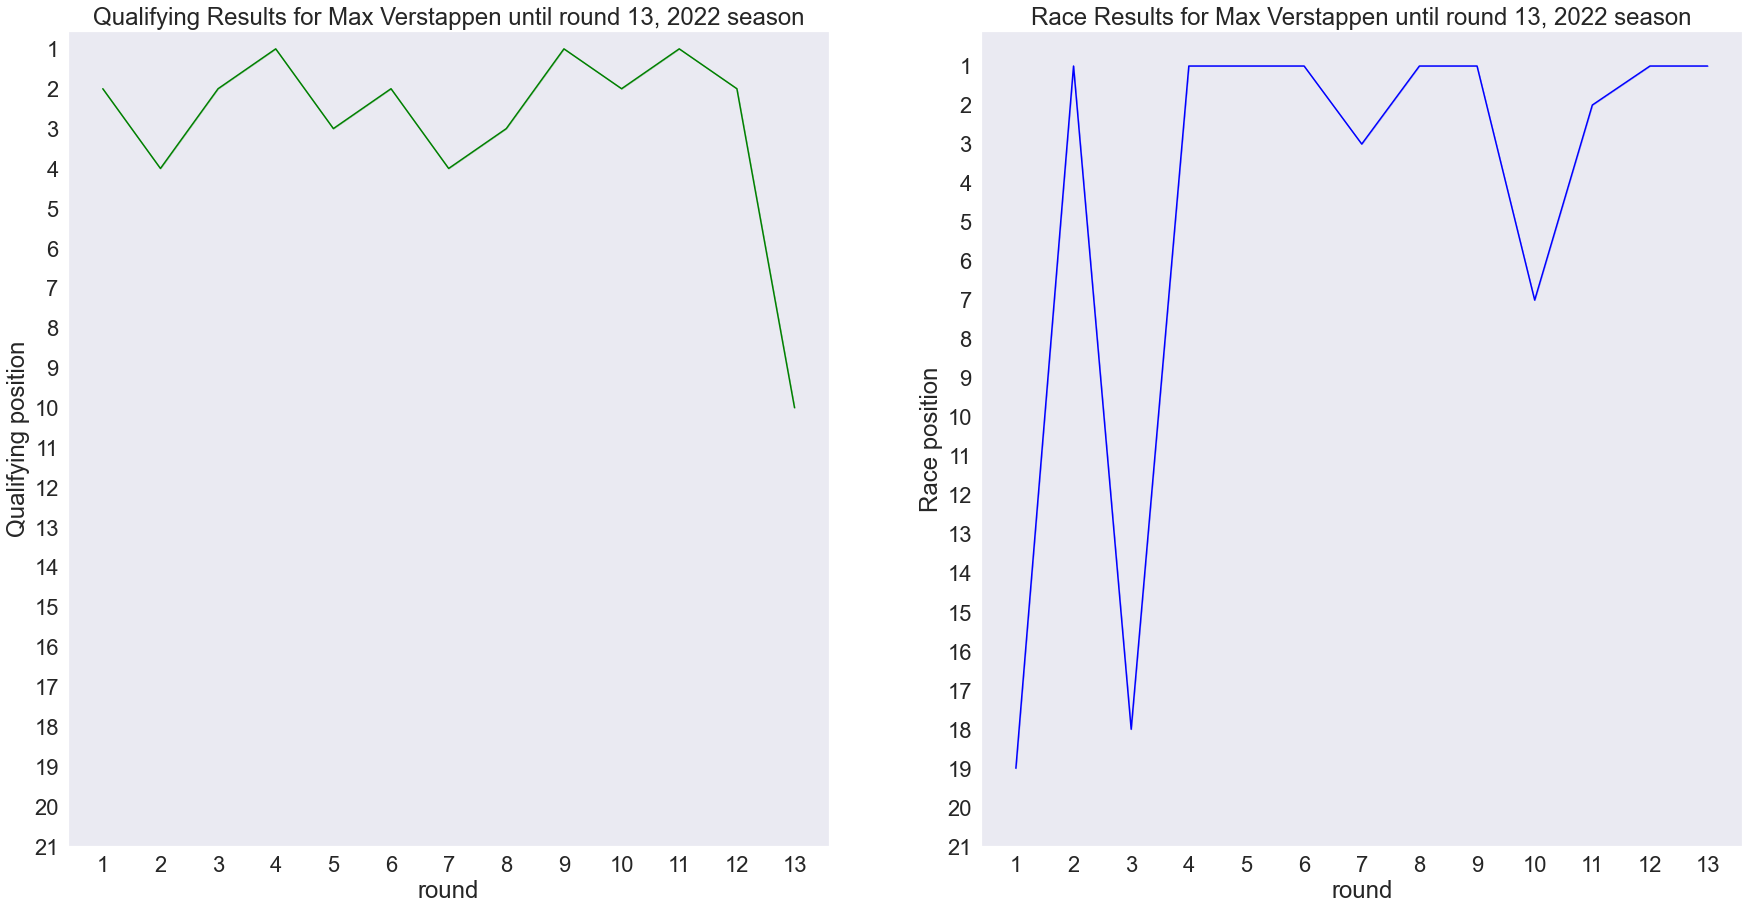

In [7]:
# Get qualifying results data for Max Verstappen
data_quali_VER = all_quali_results_melted[all_quali_results_melted['variable'] == 'VER']

# Get race results data for Max Verstappen
data_race_VER = all_race_results_melted[all_race_results_melted['variable'] == 'VER']

# Set font size of axes titles and labels
sns.set(font_scale=2)

# Initiate plot, specifying axes and figure size
fig2, (ax_quali_VER, ax_race_VER) = plt.subplots(1,2, figsize=(30,15))

# Generate subplot of qualifying results data for Max Verstappen
sns.lineplot(
        x='round', 
        y='value',
        color='green',
        data=data_quali_VER,
        ax = ax_quali_VER);
ax_quali_VER.invert_yaxis()
ax_quali_VER.set_ylabel("Qualifying position")
ax_quali_VER.set_xticks(range(1, rounds + 1))
ax_quali_VER.set_yticks(range(1, 22));
ax_quali_VER.grid(False)
ax_quali_VER.set_title("Qualifying Results for Max Verstappen until round 13, 2022 season");

# Generate subplot of race results data for Max Verstappen
sns.lineplot(
        x='round', 
        y='value', 
        color='blue',
        data=data_race_VER,
        ax = ax_race_VER);
ax_race_VER.invert_yaxis()
ax_race_VER.set_ylabel("Race position")
ax_race_VER.set_xticks(range(1, rounds + 1))
ax_race_VER.set_yticks(range(1, 22));
ax_race_VER.grid(False)
ax_race_VER.set_title("Race Results for Max Verstappen until round 13, 2022 season");

We can now repeat this process for the other drivers.

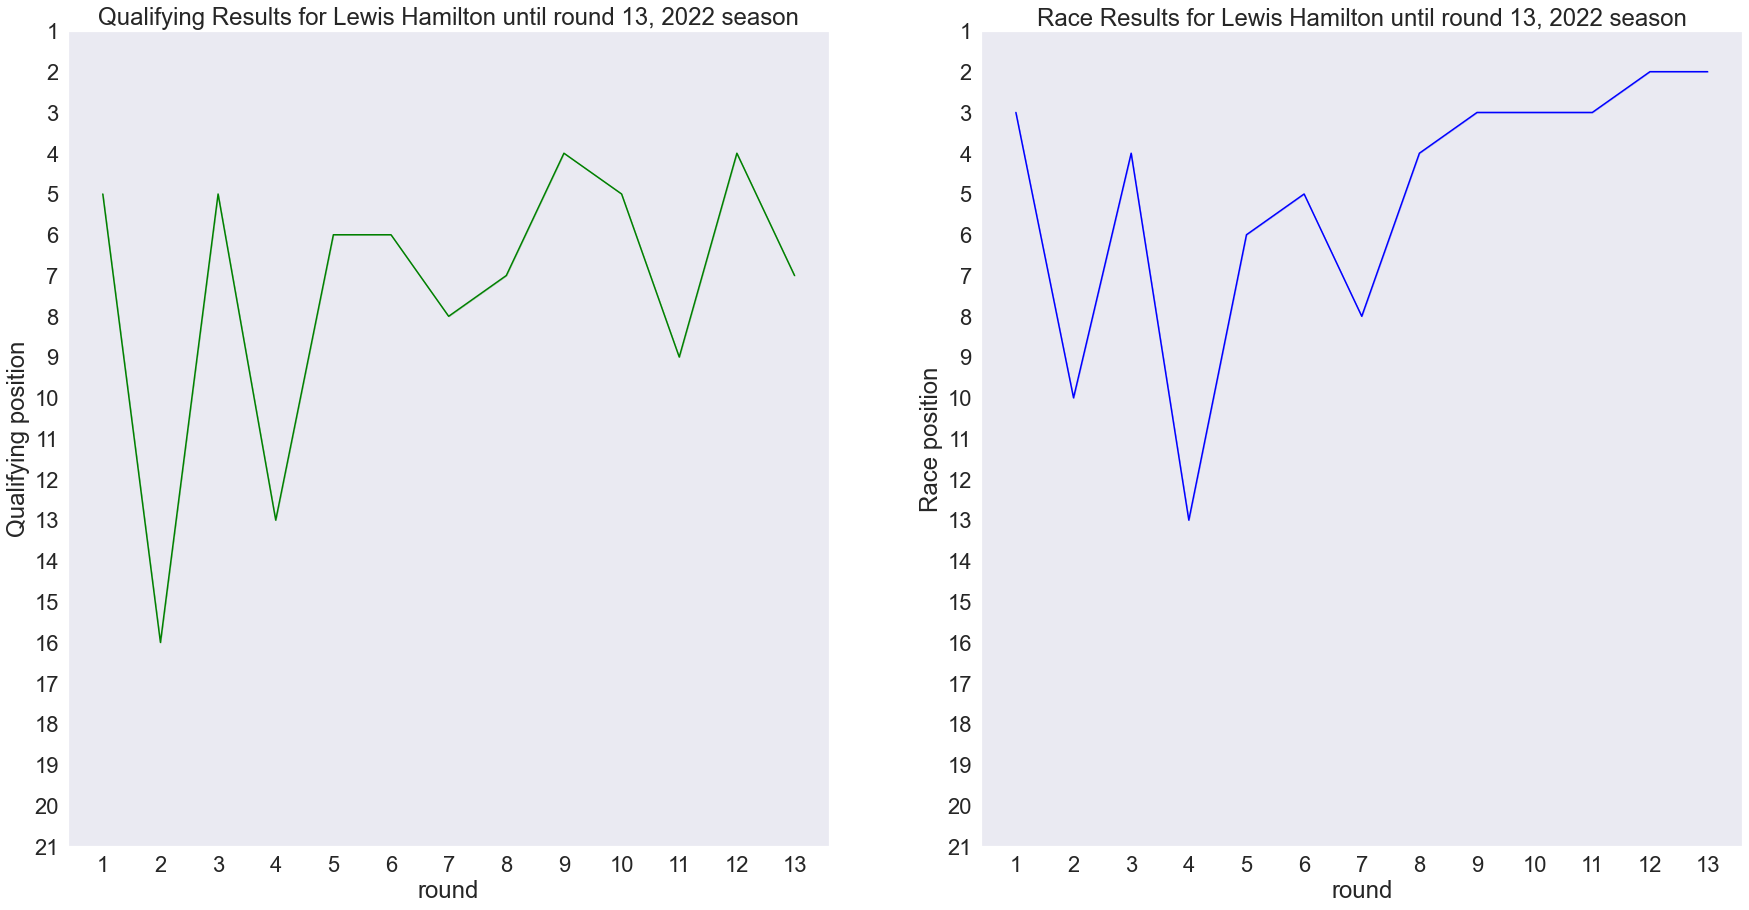

In [9]:
# Get qualifying results data for Lewis Hamilton
data_quali_HAM = all_quali_results_melted[all_quali_results_melted['variable'] == 'HAM']

# Get race results data for Lewis Hamilton
data_race_HAM = all_race_results_melted[all_race_results_melted['variable'] == 'HAM']

# Set font size of axes titles and labels
sns.set(font_scale=2)

# Initiate plot, specifying axes and figure size
fig3, (ax_quali_HAM, ax_race_HAM) = plt.subplots(1,2, figsize=(30,15))

# Generate subplot of qualifying results data for Lewis Hamilton
sns.lineplot(
        x='round', 
        y='value',
        color='green',
        data=data_quali_HAM,
        ax = ax_quali_HAM);
ax_quali_HAM.invert_yaxis()
ax_quali_HAM.set_ylabel("Qualifying position")
ax_quali_HAM.set_xticks(range(1, rounds + 1))
ax_quali_HAM.set_yticks(range(1, 22));
ax_quali_HAM.grid(False)
ax_quali_HAM.set_title("Qualifying Results for Lewis Hamilton until round 13, 2022 season");

# Generate subplot of race results data for Lewis Hamilton
sns.lineplot(
        x='round', 
        y='value', 
        color='blue',
        data=data_race_HAM,
        ax = ax_race_HAM);
ax_race_HAM.invert_yaxis()
ax_race_HAM.set_ylabel("Race position")
ax_race_HAM.set_xticks(range(1, rounds + 1))
ax_race_HAM.set_yticks(range(1, 22));
ax_race_HAM.grid(False)
ax_race_HAM.set_title("Race Results for Lewis Hamilton until round 13, 2022 season");

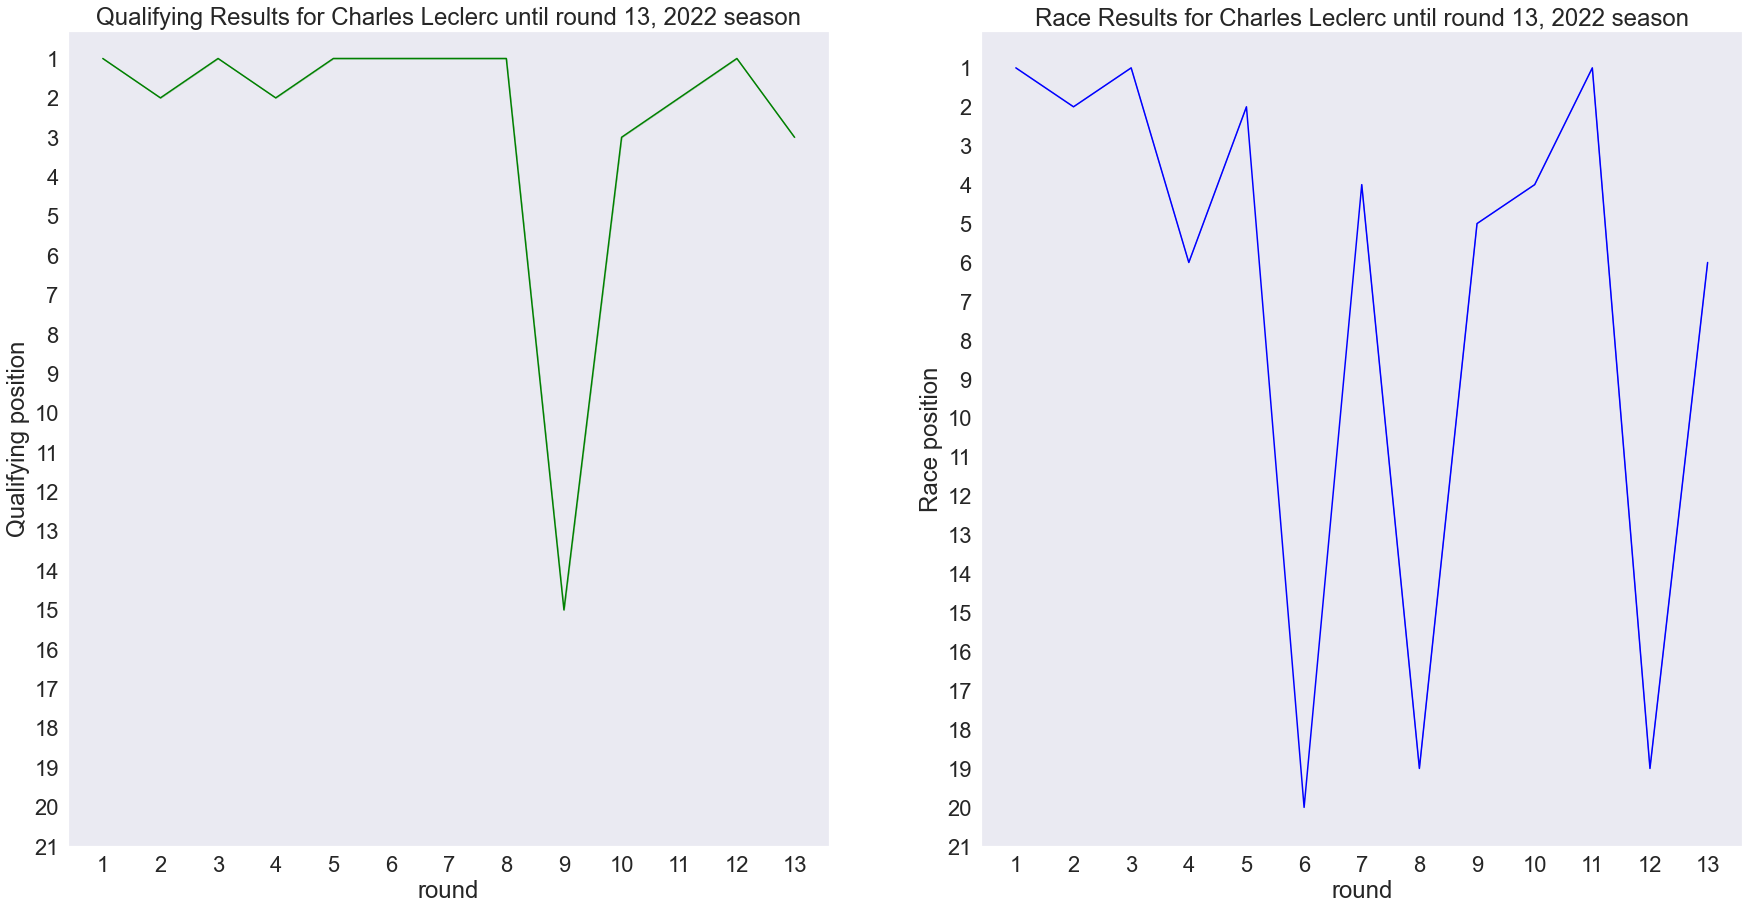

In [10]:
# Get qualifying results data for Charles Leclerc
data_quali_LEC = all_quali_results_melted[all_quali_results_melted['variable'] == 'LEC']

# Get race results data for Charles Leclerc
data_race_LEC = all_race_results_melted[all_race_results_melted['variable'] == 'LEC']

# Set font size of axes titles and labels
sns.set(font_scale=2)

# Initiate plot, specifying axes and figure size
fig4, (ax_quali_LEC, ax_race_LEC) = plt.subplots(1,2, figsize=(30,15))

# Generate subplot of qualifying results data for Charles Leclerc
sns.lineplot(
        x='round', 
        y='value',
        color='green',
        data=data_quali_LEC,
        ax = ax_quali_LEC);
ax_quali_LEC.invert_yaxis()
ax_quali_LEC.set_ylabel("Qualifying position")
ax_quali_LEC.set_xticks(range(1, rounds + 1))
ax_quali_LEC.set_yticks(range(1, 22));
ax_quali_LEC.grid(False)
ax_quali_LEC.set_title("Qualifying Results for Charles Leclerc until round 13, 2022 season");

# Generate subplot of race results data for Charles Leclerc
sns.lineplot(
        x='round', 
        y='value', 
        color='blue',
        data=data_race_LEC,
        ax = ax_race_LEC);
ax_race_LEC.invert_yaxis()
ax_race_LEC.set_ylabel("Race position")
ax_race_LEC.set_xticks(range(1, rounds + 1))
ax_race_LEC.set_yticks(range(1, 22));
ax_race_LEC.grid(False)
ax_race_LEC.set_title("Race Results for Charles Leclerc until round 13, 2022 season");

### Comments and next steps
1. For some reason I was unable to extract data for the 2022 season beyond the 13th round
2. Explore if there is a way to automate this process by looping through the array of driver codes